In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## First Question: 
 <ul>Who were the passengers on the Titanic?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

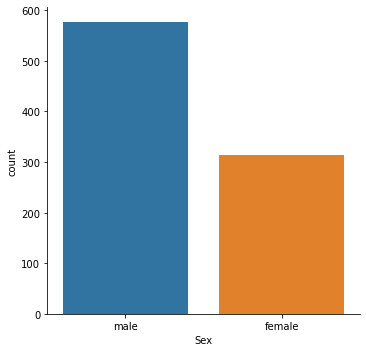

In [16]:
# catplot --> allows you to just pass a column argument.  data indicates where the data is coming from
# have to say kind='count' to get the y axis
sns.catplot("Sex",data=titanic_df,kind="count")

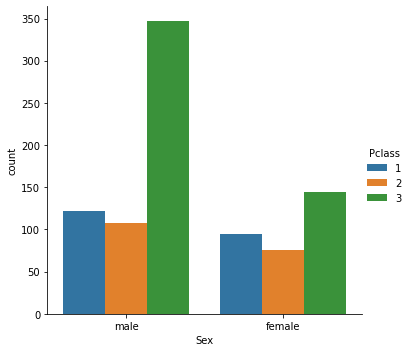

In [15]:
# 

sns.catplot("Sex",data=titanic_df,kind="count",hue='Pclass')

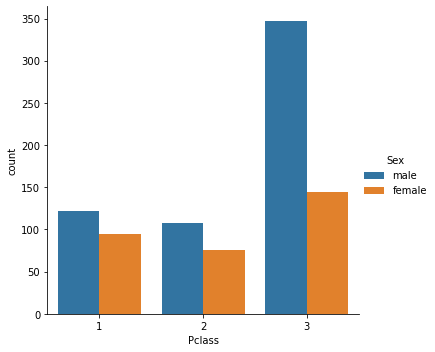

In [17]:
#different way to display above

sns.catplot("Pclass",data=titanic_df,kind="count",hue='Sex')

In [18]:
# Look at male, female and children ratio using 'apply' technique to create a function
# lecture 45 to learn 'apply'

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [19]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [20]:
titanic_df[0:10]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

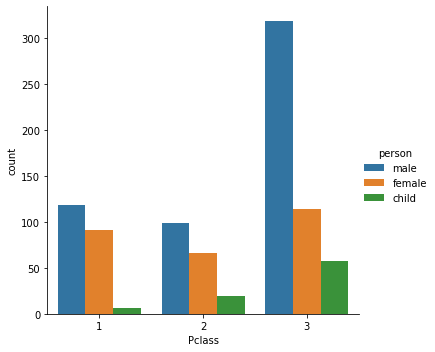

In [22]:
sns.catplot("Pclass",data=titanic_df,kind="count",hue="person")

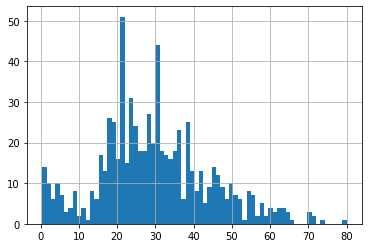

In [23]:
# create a distribution of the ages to get a more precise picture of who the passengers were
# use histogram

titanic_df['Age'].hist(bins=70)

In [24]:
titanic_df['Age'].mean()

29.69911764705882

In [25]:
# overal comparison of male female and child

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [26]:
# Another way to visualize this data, facet grid to create multiple KDE plots on 1 plot
#facet grid allows you to do multiple plots in 1 figure

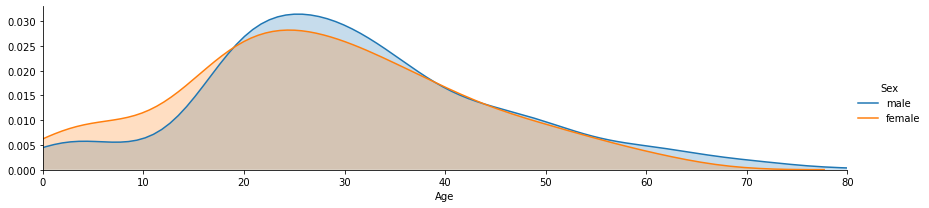

In [27]:
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

#since no one can be negative years old, setting the x axis from 0 to the oldest age
fig.set(xlim=(0,oldest))

#add a legend
fig.add_legend()

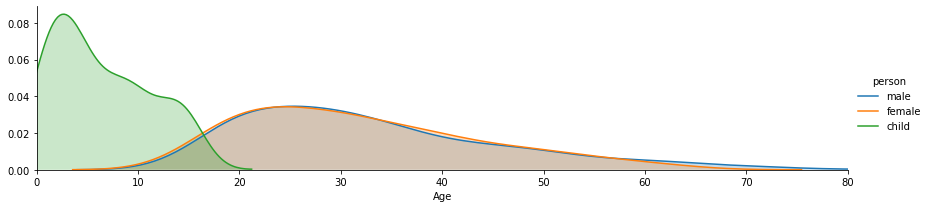

In [28]:
# including children
# because KDE has a bandwidth, the plot goes past the 16 mark

fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

#since no one can be negative years old, setting the x axis from 0 to the oldest age
fig.set(xlim=(0,oldest))

#add a legend
fig.add_legend()

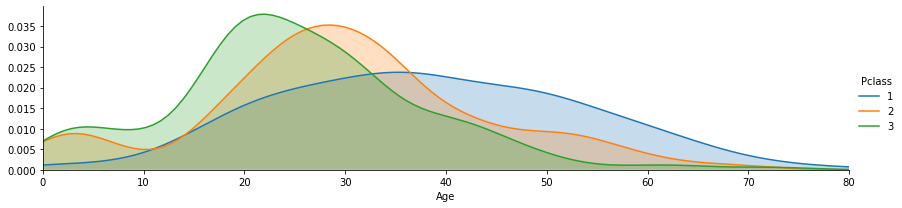

In [29]:
# look at how age ranges with class

fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

#since no one can be negative years old, setting the x axis from 0 to the oldest age
fig.set(xlim=(0,oldest))

#add a legend
fig.add_legend()

## Second Question: 
<ul>What deck were the passengers on and how does that relate to their class?</li>

In [31]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [32]:
# Cabin columns have NaN values, need to remove

deck = titanic_df['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

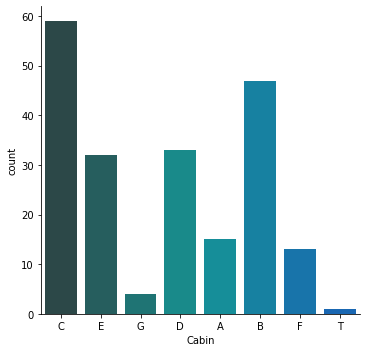

In [34]:
# only need the first letter that indicates which deck

levels = []

for level in deck:
    levels.append(level[0])
    
# reset dataframe and use a catplot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df, palette='winter_d',kind='count')

In [33]:
# doc on choosing color palette.  adding '_d' to the color name will make it darker

import webbrowser
url='http://matplotlib.org/users/colormaps.html'

webbrowser.open(url)

True

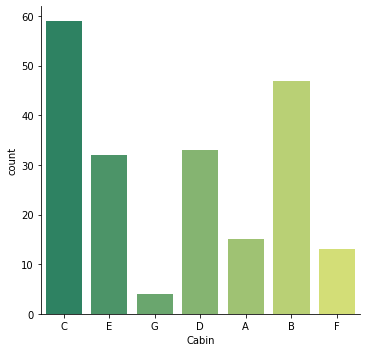

In [37]:
# Cabin T does not make sense, so will remove

cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot('Cabin',data=cabin_df, kind='count', palette='summer')

In [38]:
# 'Embarked' column-  explains which port they embarked from 
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

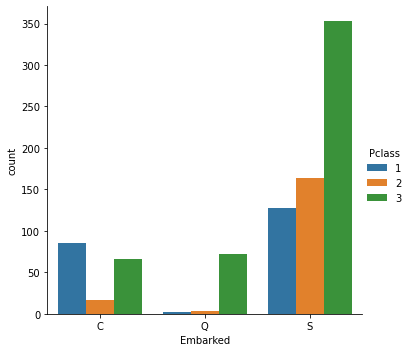

In [41]:
# what we find here is that almost all passengers in 'Q' were 3rd class, makes you think what 
# were the economics of that city in that period and what were the economics of 'S' where a 
# a lot of first class were passengers

sns.catplot('Embarked', data=titanic_df, kind='count',hue='Pclass', order=['C','Q','S'])

## Third Question:
<ul>Who was alone and who was with family?</ul>

In [42]:
#'SibSp' refers to whether they had siblings.  1=yes, 0 =no
# 'Parch' refers to whether they had a parent on board.  1=yes, 0=no
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [43]:
# adding a column that says if person is alone

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  person  Alone  
0        0         A/5 21171   7.2500   NaN        S    male      1  
1        0          PC 17599  71.2833   C85        C  female      1  
2        0  STON/O2. 3101282   7.9250   NaN        S  female      0  
3        0            113803  53.1000  C123        S  female      1  
4        0            373450   8.0500   NaN        S    male      0  
..     ...               ...      ...   ...      ...     ...    ...  
886      0            211536  13.0000   NaN        S    male      0  
887      0            112053  30.0000   B42        S  female      0  
888      2        W./C. 6607  23.4500   NaN        S  female      3  
889      0            111369  30.0000  C148        C    male      0  
890      0            370376   7.7500   NaN        Q    male      0  

[891 rows x 14 columns]

In [44]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [45]:
# look at the 'Alone' column, look for anything in the 'Alone' column that is > 0 and write 'With Family'
# look at the 'Alone' column, look for anything in the 'Alone' column that is = 0, write 'Alone'
# pink box will pop up when you run this cell, it's just a warning you can ignore


titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\mokae\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  person        Alone  
0      0         A/5 21171   7.2500   NaN        S    male  With Family  
1      0          PC 17599  71.2833   C85        C  female  With Family  
2      0  STON/O2. 3101282   7.9250   NaN        S  female        Alone  
3      0            113803  53.1000  C123        S  female  With Family  
4      0            373450   8.0500   NaN        S    male        Alone

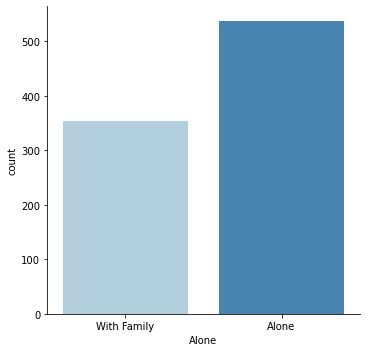

In [47]:
# now plot the information

sns.catplot('Alone', data=titanic_df, kind='count', palette='Blues')

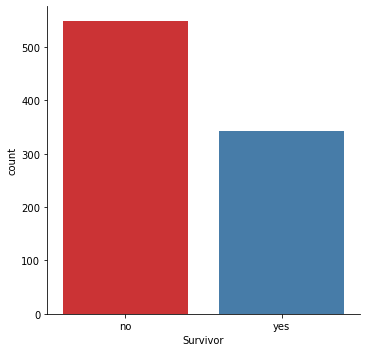

In [48]:
# what factors help a person survive the sinking of the Titanic

#make a new column named 'Survivor', look at the column 'Survived' and grab info and make it 0 if not survive
#1 if survived
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot('Survivor', data=titanic_df, kind='count',palette='Set1')

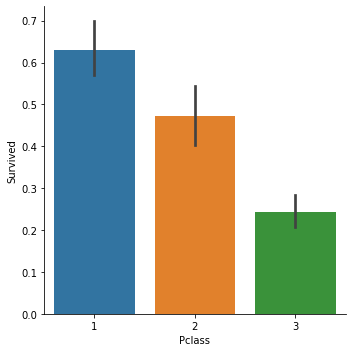

In [52]:
# now look at factors that affect survival rates

# Class Factor
sns.catplot('Pclass', 'Survived', kind='bar',data=titanic_df)

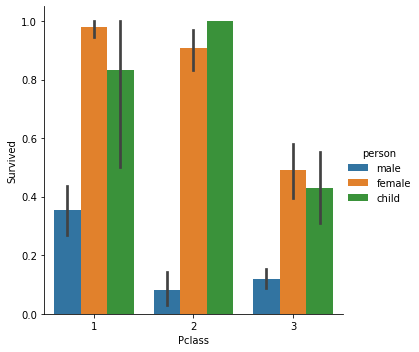

In [53]:
# male,female,child Factor
sns.catplot('Pclass', 'Survived', hue='person', kind='bar',data=titanic_df)

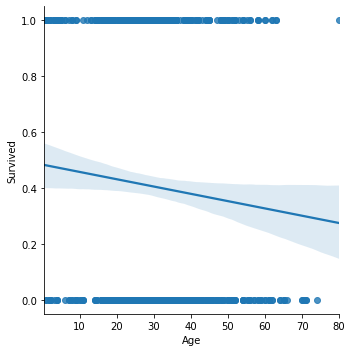

In [54]:
# Age factor, using linear plot
# @ top (1.0) means they survived with corresponding age on the xaxis
# @ bottom is who did not survive (0.0) 
# general trend is that the older the passenger the less chance they survive

sns.lmplot('Age','Survived',data=titanic_df)


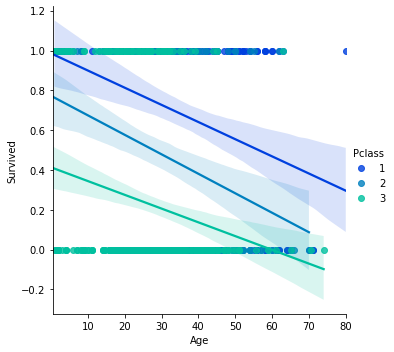

In [56]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df, palette='winter')

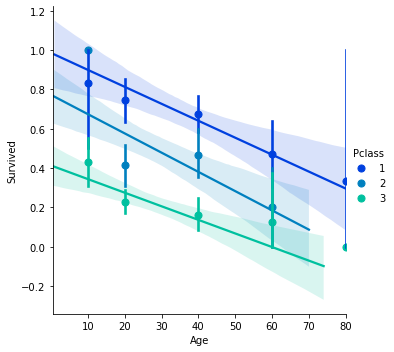

In [59]:
# can clean up to make it easier to understand, removing all the data points along the top and bottom
# and putting into bins (generations)

generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter', x_bins=generations)

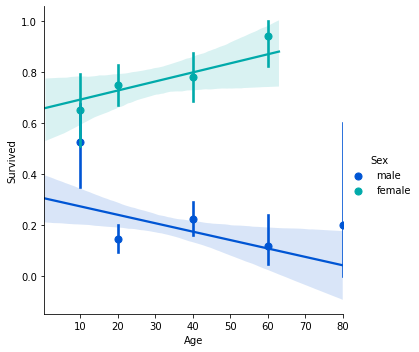

In [62]:
# Gender and Age 
# can see that the chances of survival are worse for males than females

sns.lmplot('Age','Survived',hue='Sex',data=titanic_df, palette='winter',x_bins=generations)

## 1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?



## 2.) Did having a family member increase the odds of surviving the crash?